# Machine Learning exercise 1-5 ANN

## Import libraries and data

In [159]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import scipy
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import figure
from weather_data_processor  import weatherData_select
from mlphelpers import train_and_evaluate_mlp
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [161]:
#Create a path to where your data is stored.
path = r'/Users/tiffk/Machine Learning/ClimateWins'

In [163]:
df_climate = pd.read_csv(os.path.join(path, 'Data', 'Raw Data', 'Dataset-weather-prediction-dataset-processed.csv'), low_memory=False, index_col = False)

In [165]:
#Read in the pleasant weather data.
pleasantweather = pd.read_csv(os.path.join(path, 'Data','Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'))

## Select stations and variables

In [167]:
# use weathData_select() which lets you enter stations that you want to drop in a non-case sensitive manner and drops all of the related columns. It also allows you to choose variables to drop for all stations.
df_relevant = weatherData_select(df_climate)

Enter stations to drop (separated by comma):  gdansk,roma,tours
Enter variables to drop (separated by comma):  snow_depth


In [169]:
df_relevant.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0.7,6.5,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,1.1,6.1,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0.0,8.5,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,4.1,6.3,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,5.4,3.0,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


## Split into training and testing sets

In [172]:
# Create an 'X' matrix, drop unneeded columns.
X = df_relevant.drop(['DATE', 'MONTH'], axis=1)
y = pleasantweather.drop(['DATE'], axis=1)

In [174]:
print(X.shape)
print(y.shape)

(22950, 141)
(22950, 15)


In [176]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [201]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 141)
(5738, 141)
(17212, 15)
(5738, 15)


In [180]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Artificial Neural Networks (ANNs) with custom functions

## ANN Model 1: 3 layers (45,35,25) 2700 max iterations tolerance: .000001

In [190]:
# Call the train_and_evaluate_mlp function
results, y_train_pred, y_test_pred = train_and_evaluate_mlp(X_train, y_train, X_test, y_test)
# Print the results DataFrame to see the outcomes
print(results)

Enter the number of hidden layers:  3
Enter the number of nodes in each layer (comma-separated):  45,35,25
Enter the number of maximum iterations:  2700
Enter the tolerance:  .000001


Training Accuracy: 0.6087613293051359
Test Accuracy: 0.5846985012199373
  Hidden Layers   Layer Sizes Max Iterations  Tolerance  Training Accuracy  \
0             3  (45, 35, 25)           2700   0.000001           0.608761   

   Test Accuracy  
0       0.584699  


C:\Users\tiffk\mlphelpers.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row_df], ignore_index=True)


### ANN Model Training Accuracy 60.876% Test Accuracy 58.469% - 3 layers (45,35,25) 2700 max iterations tolerance: .000001

In [205]:
print(y_test_pred.shape)  # Shape of predicted labels for the test set
print(y_test.shape)       # Shape of actual labels for the test set
print(y_train_pred.shape) # Shape of predicted labels for the training set
print(y_train.shape)      # Shape of actual labels for the training set

(5738, 15)
(5738, 15)
(17212, 15)
(17212, 15)


In [209]:
locations = list({x.split("_")[0] for x in df_relevant.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'SONNBLICK',
 'STOCKHOLM',
 'VALENTIA']

### Testing

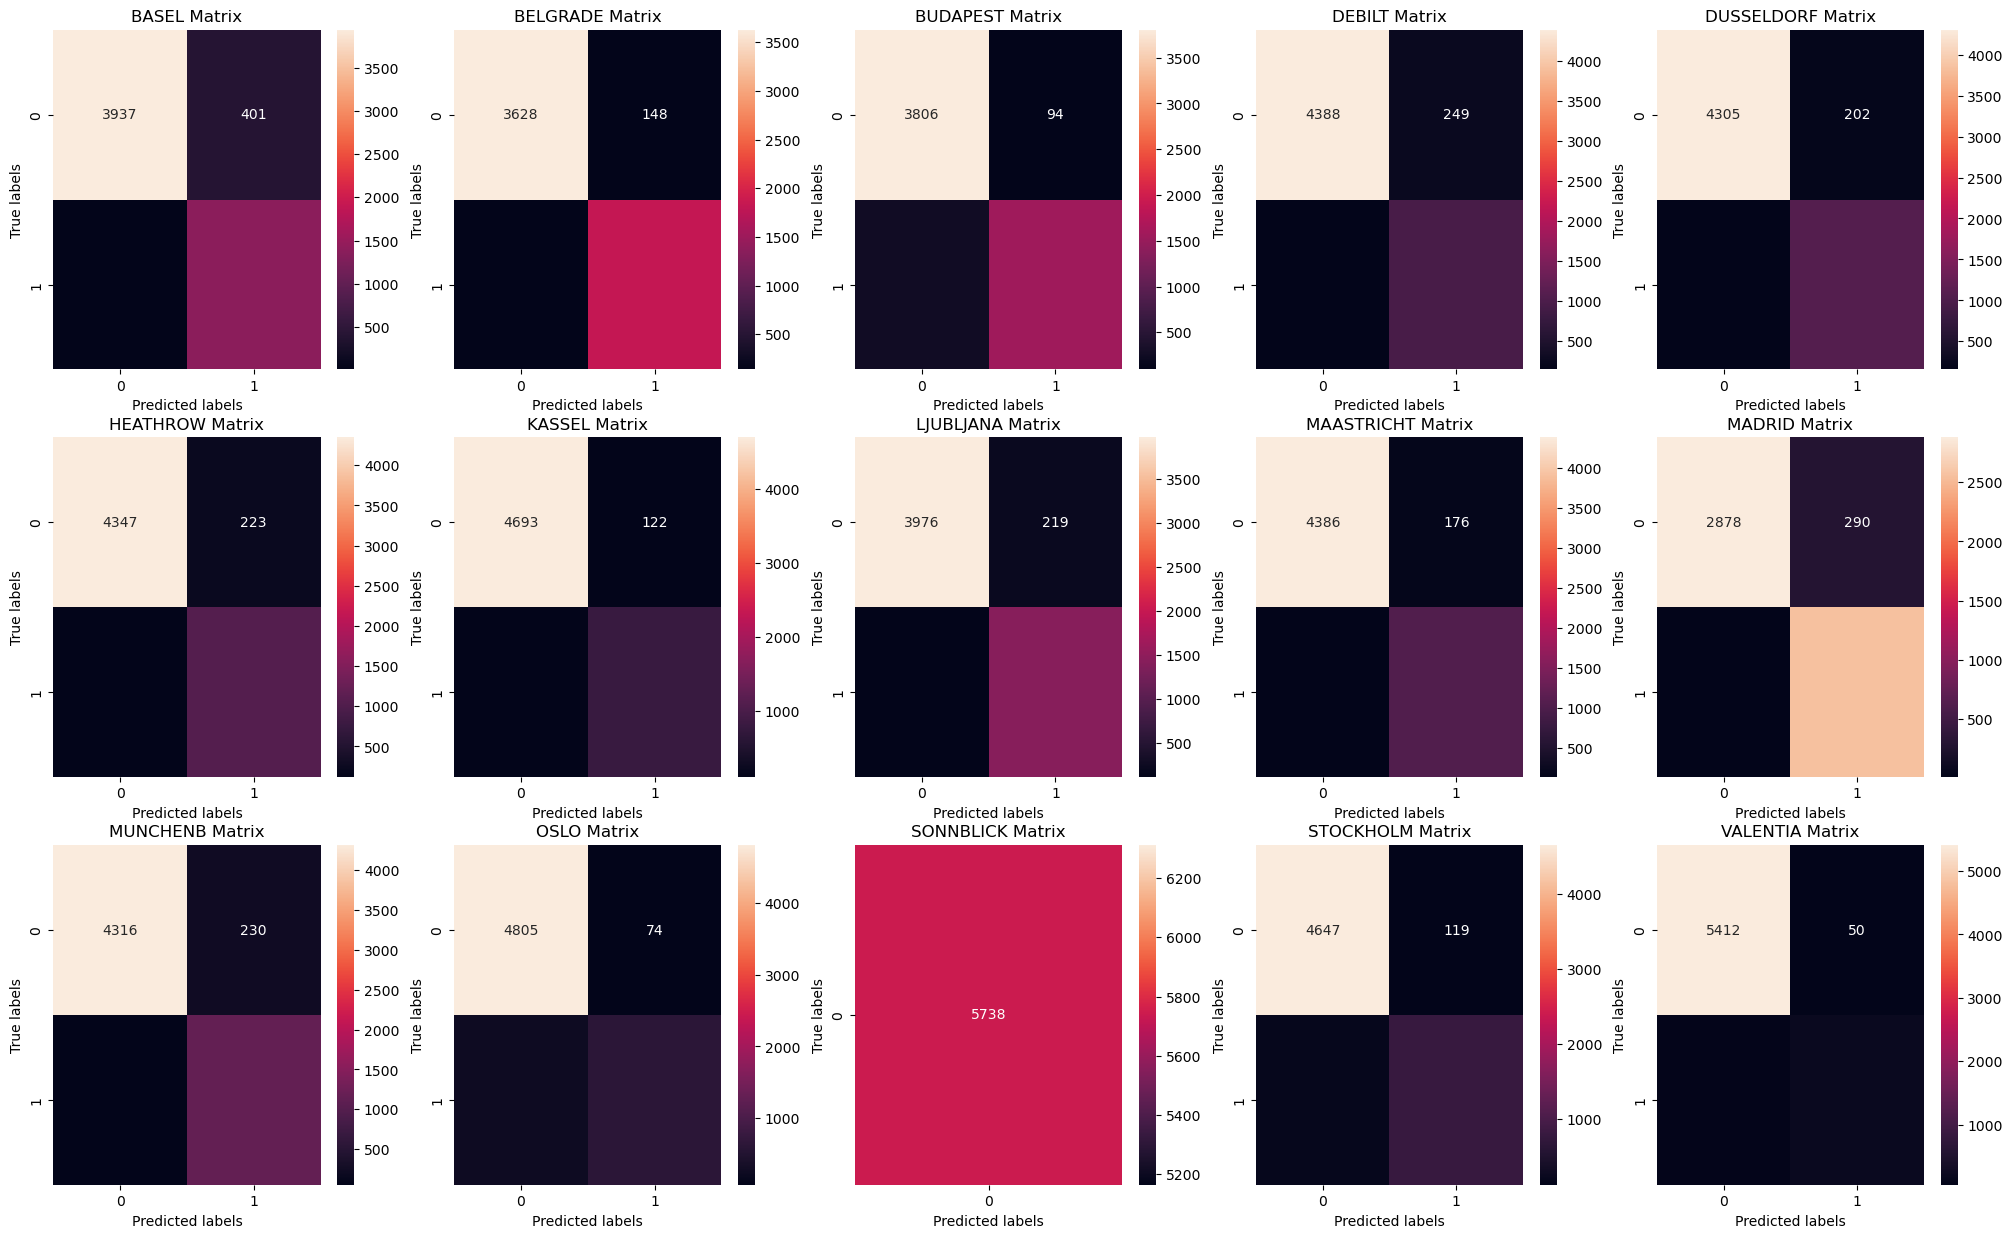

In [215]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_test_pred[:,count])  # Access elements directly from the numpy array
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

### Training

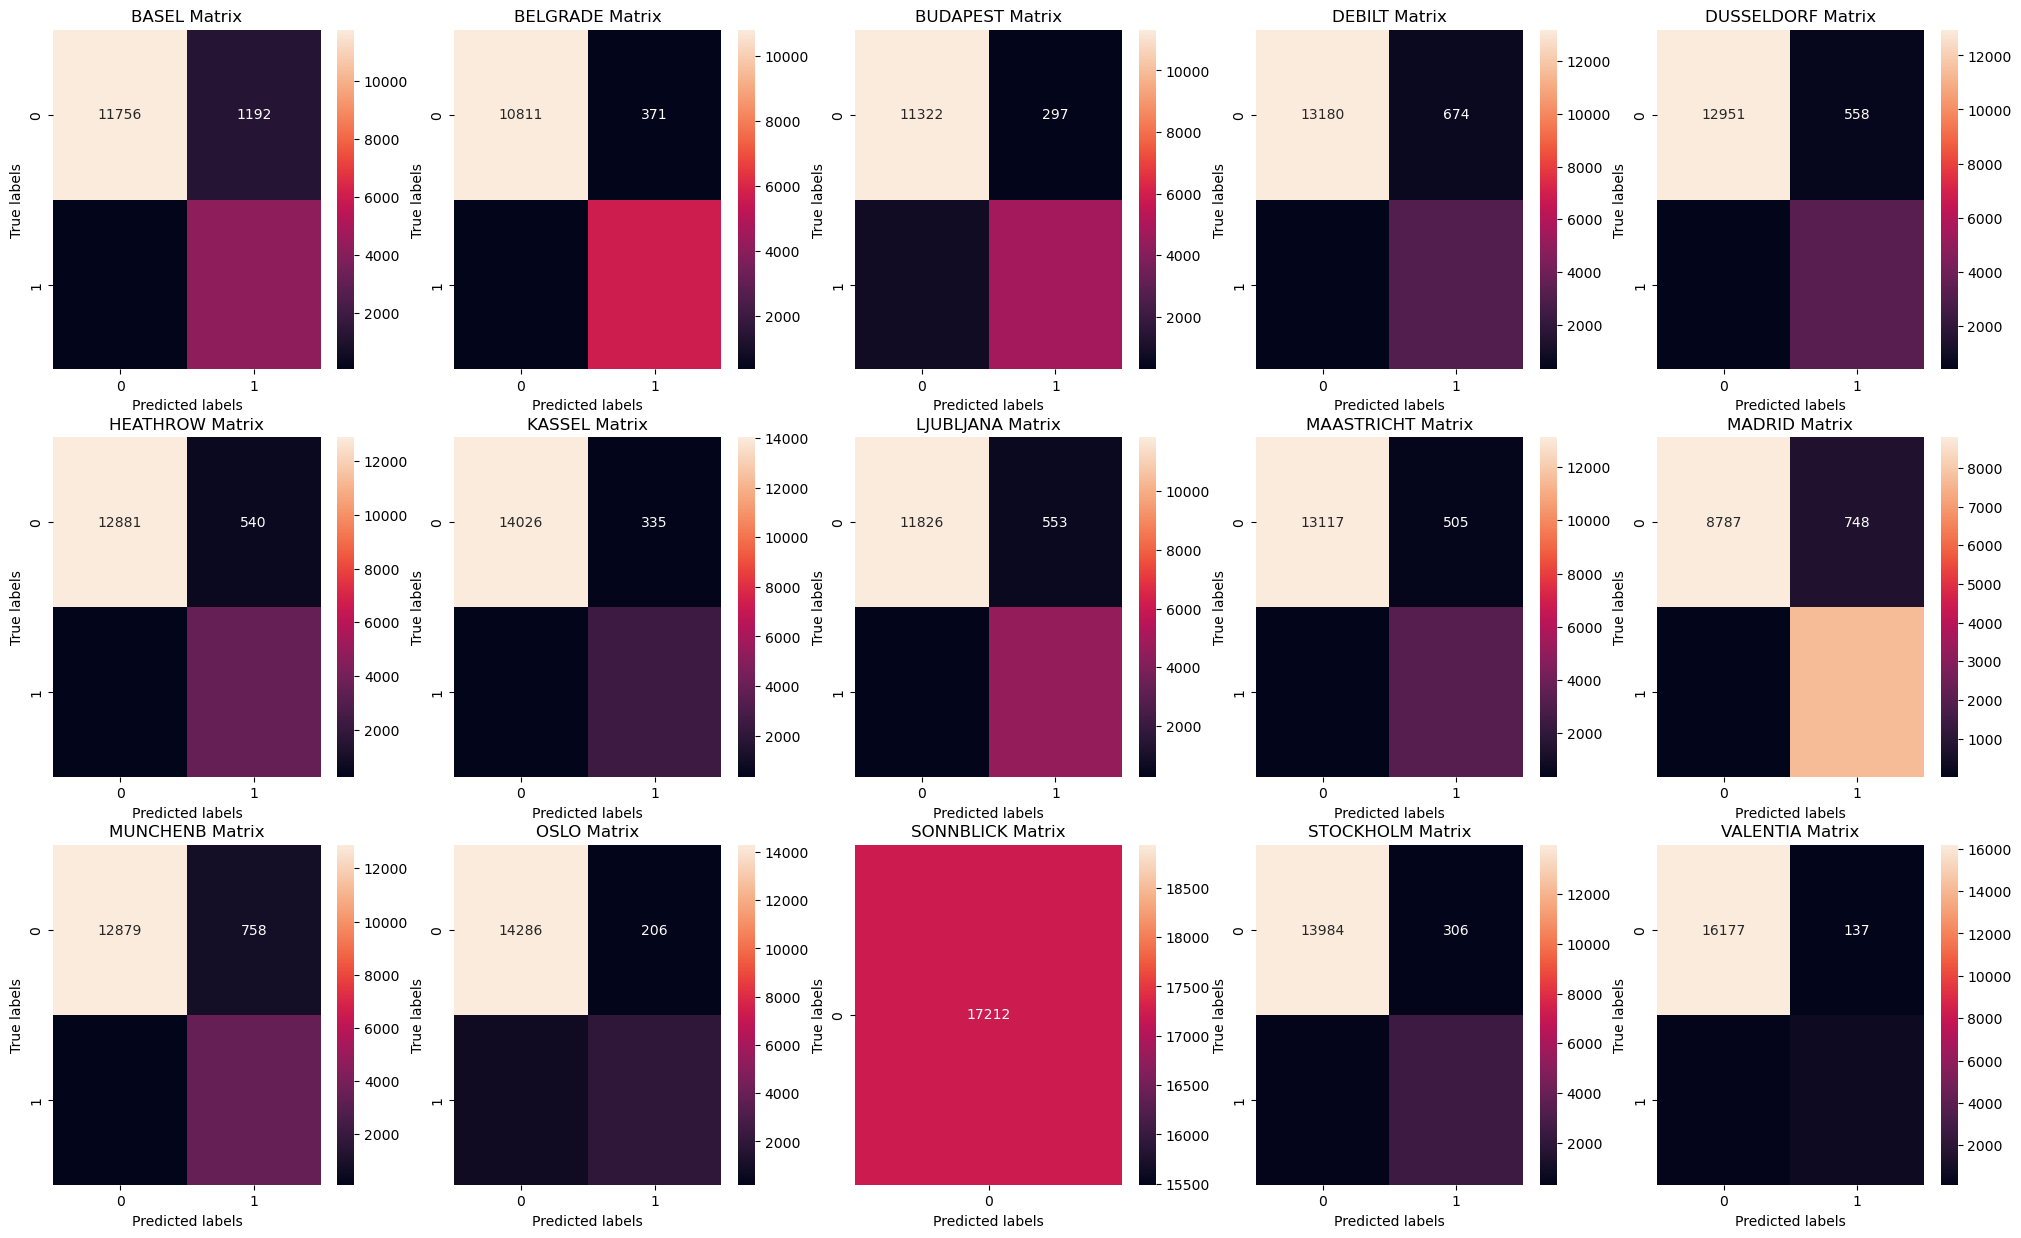

In [221]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train[:,count], y_train_pred[:,count])  # Access columns directly
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

## ANN Model 2: 3 layers (40,40,40) 3400 max iterations tolerance: .00001

In [229]:
# Call the train_and_evaluate_mlp function
results, y_train_pred, y_test_pred = train_and_evaluate_mlp(X_train, y_train, X_test, y_test)
# Print the results DataFrame to see the outcomes
print(results)

Enter the number of hidden layers:  3
Enter the number of nodes in each layer (comma-separated):  40,40,40
Enter the number of maximum iterations:  3400
Enter the tolerance:  .00001


Training Accuracy: 0.5952242621426912
Test Accuracy: 0.5711049146043917
  Hidden Layers   Layer Sizes Max Iterations  Tolerance  Training Accuracy  \
0             3  (40, 40, 40)           3400    0.00001           0.595224   

   Test Accuracy  
0       0.571105  


C:\Users\tiffk\mlphelpers.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row_df], ignore_index=True)


### ANN Model Training Accuracy 59.522% Test Accuracy 57.110% - 3 layers (40, 40, 40) 3400 max iterations tolerance: .00001

### Testing

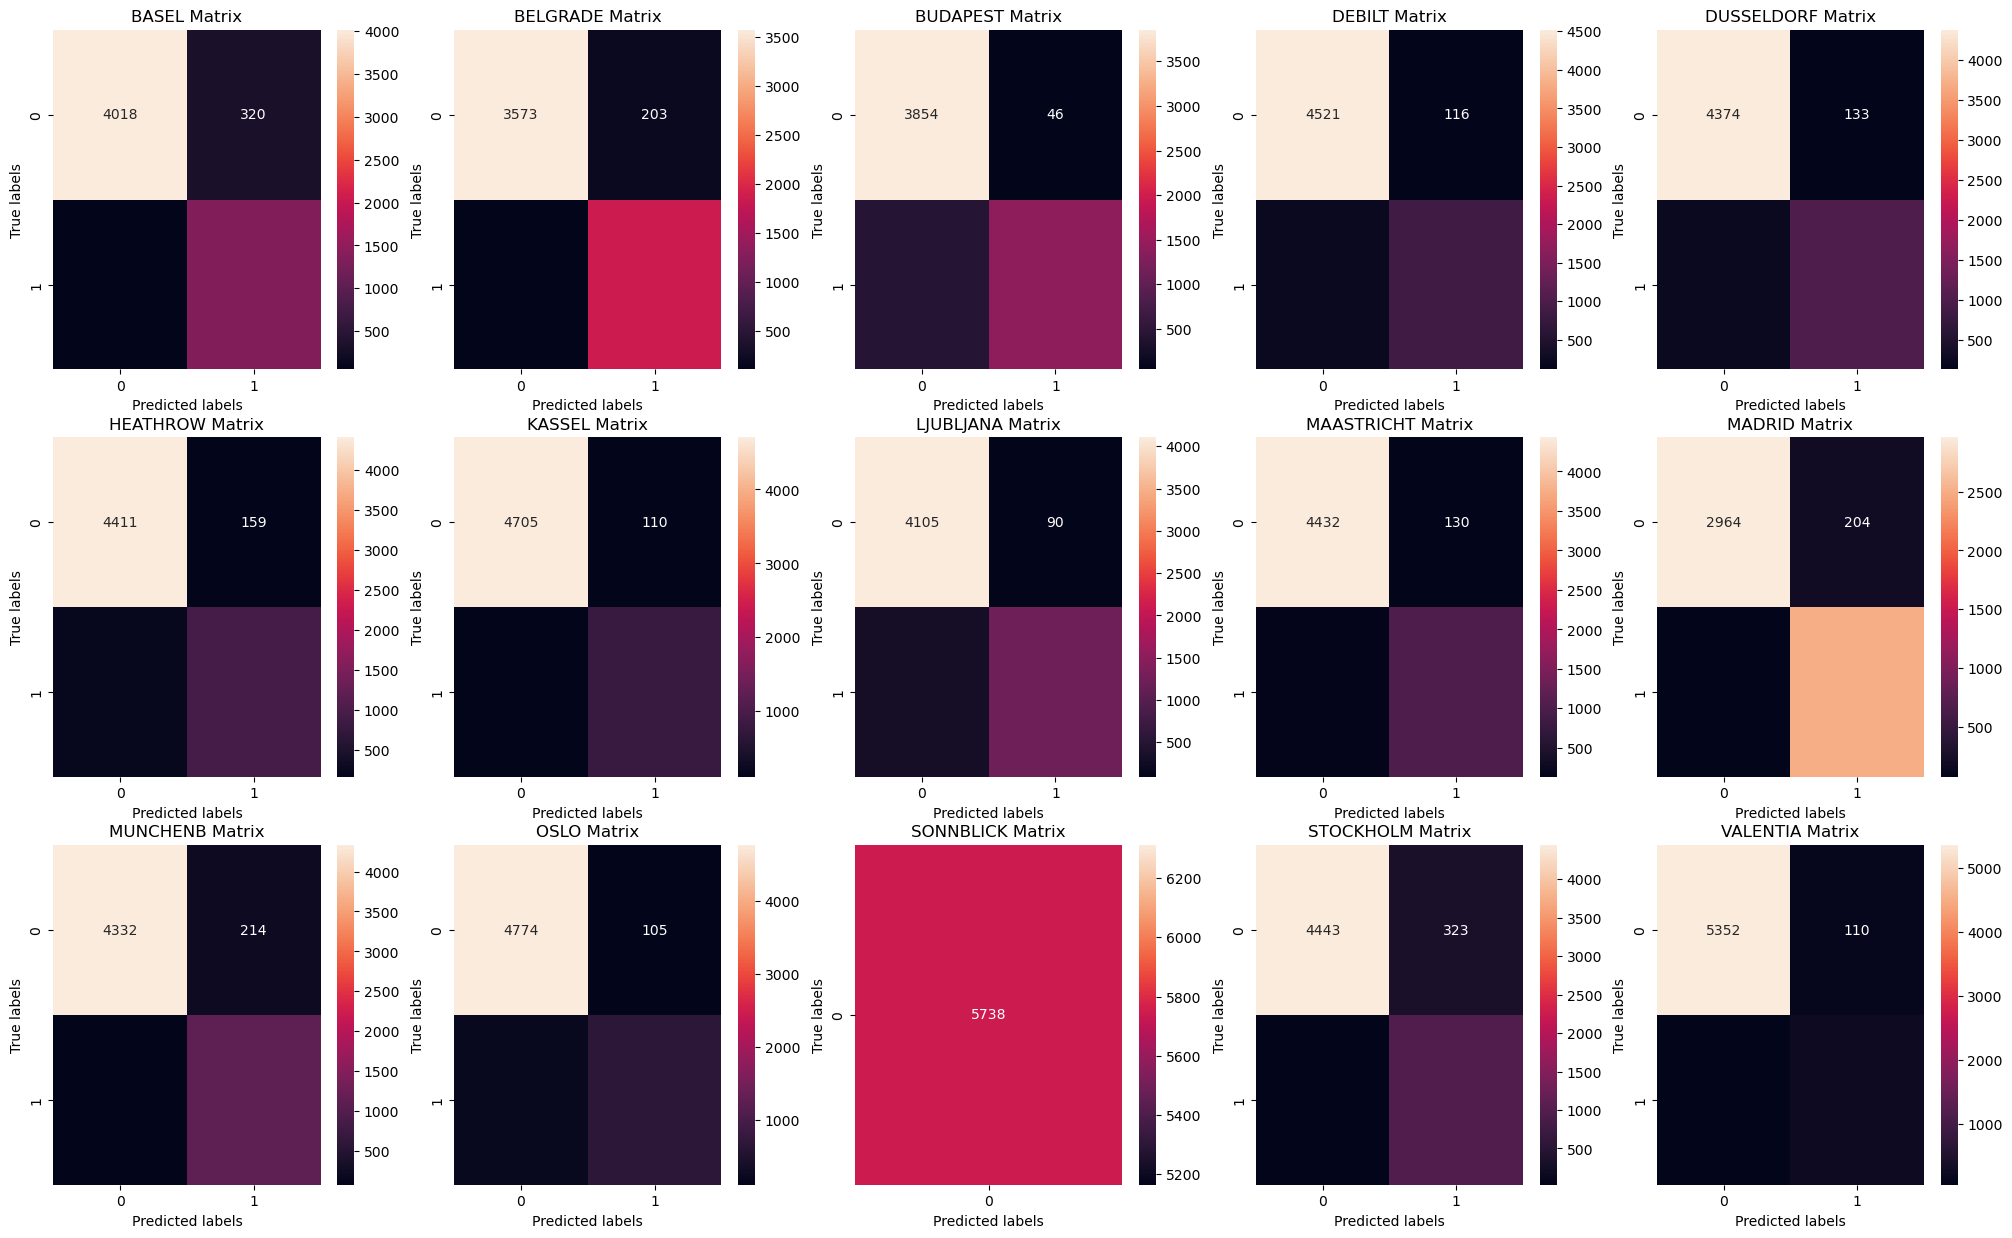

In [234]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_test_pred[:,count])  # Access elements directly from the numpy array
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

### Training

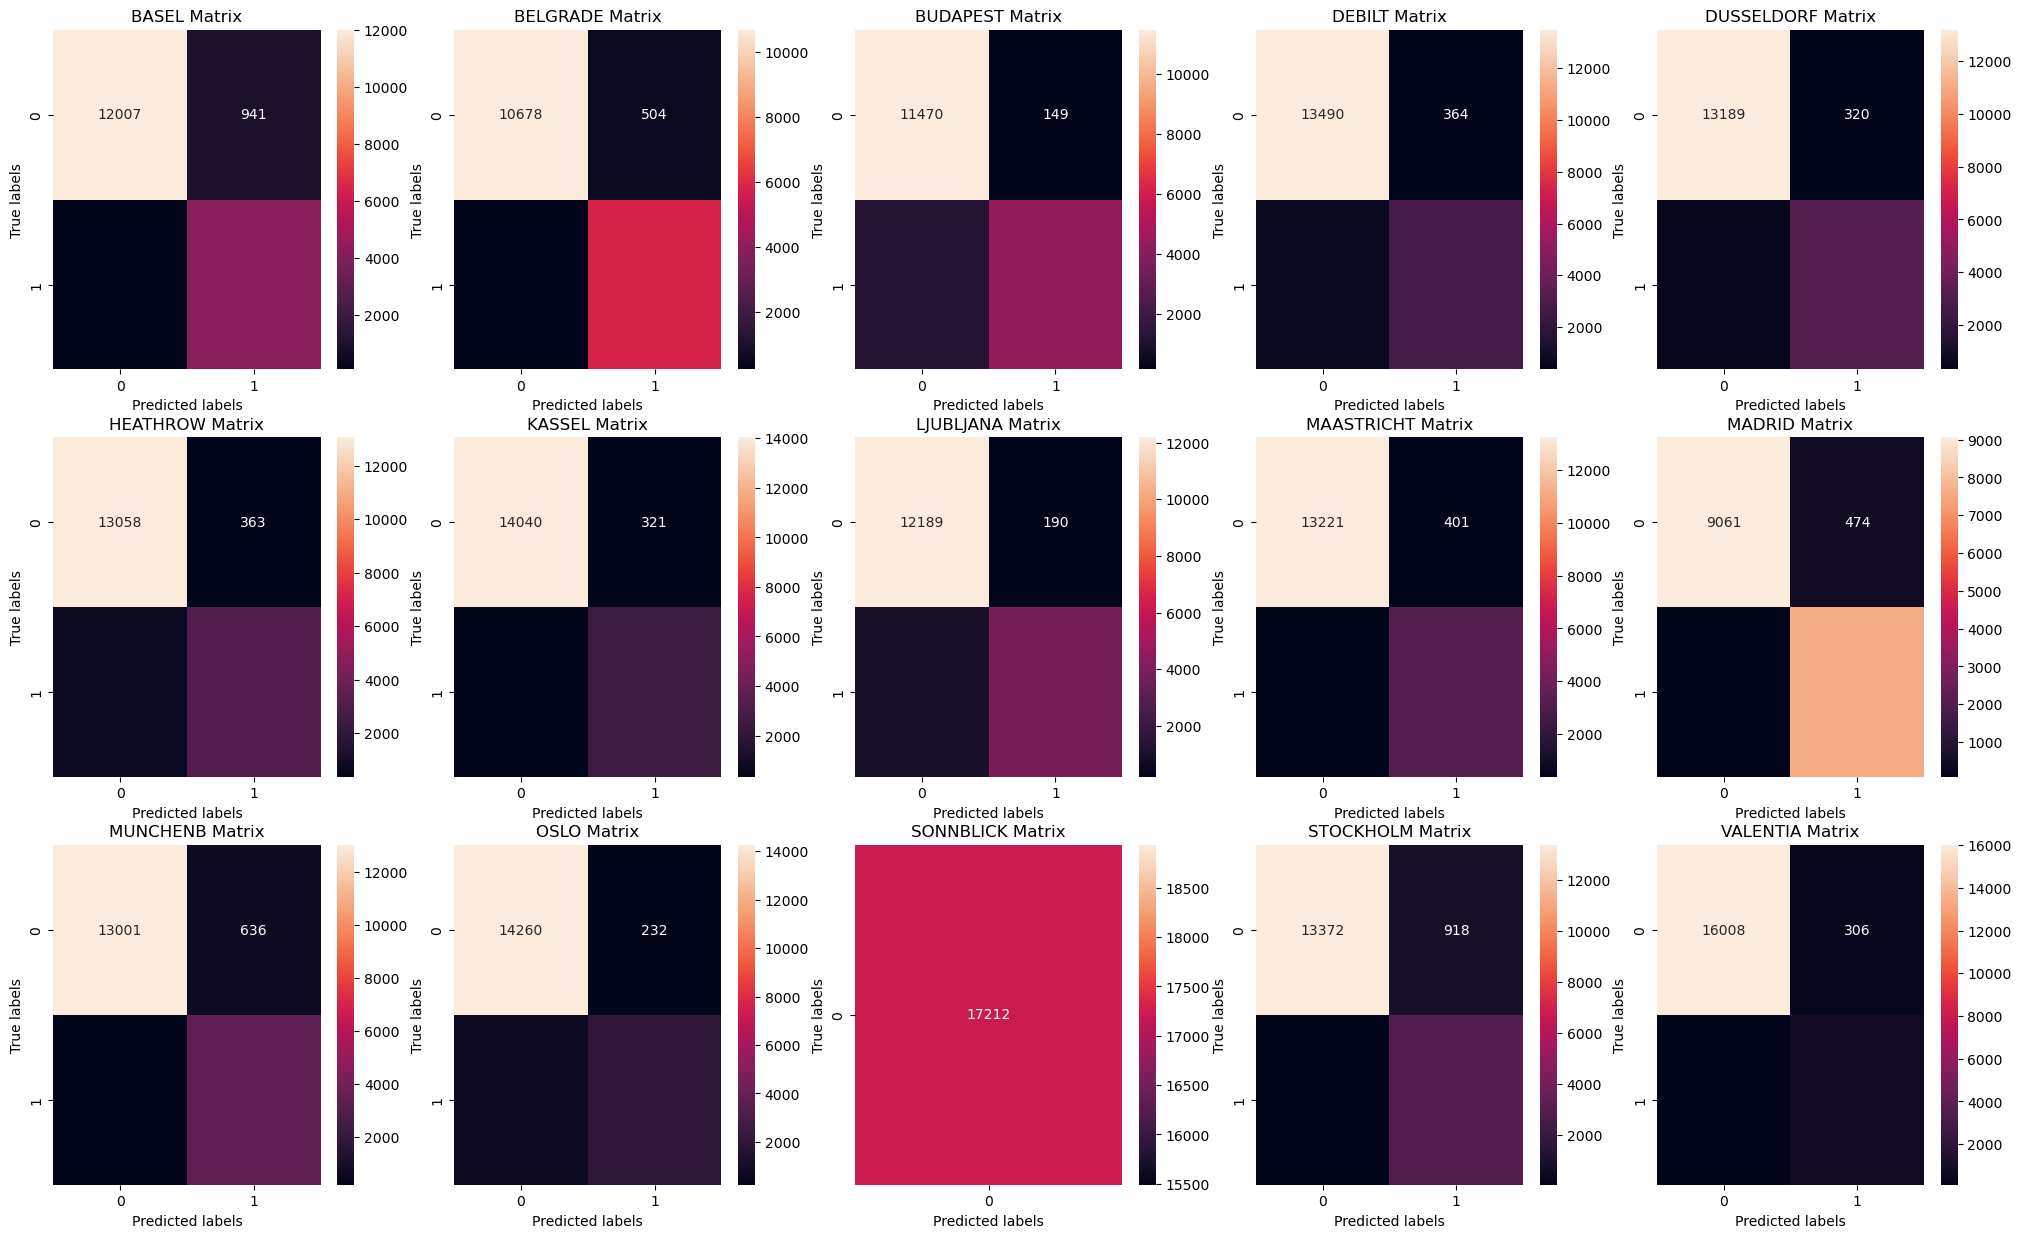

In [237]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train[:,count], y_train_pred[:,count])  # Access columns directly
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

## ANN Model 3: 3 layers (30,20,10) 2000 max iterations tolerance: .00001

In [240]:
# Call the train_and_evaluate_mlp function
results, y_train_pred, y_test_pred = train_and_evaluate_mlp(X_train, y_train, X_test, y_test)
# Print the results DataFrame to see the outcomes
print(results)

Enter the number of hidden layers:  3
Enter the number of nodes in each layer (comma-separated):  30,20,10
Enter the number of maximum iterations:  2000
Enter the tolerance:  .00001


Training Accuracy: 0.5697768998373228
Test Accuracy: 0.5561171139769955
  Hidden Layers   Layer Sizes Max Iterations  Tolerance  Training Accuracy  \
0             3  (30, 20, 10)           2000    0.00001           0.569777   

   Test Accuracy  
0       0.556117  


C:\Users\tiffk\mlphelpers.py:87: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, new_row_df], ignore_index=True)


### ANN Model Training Accuracy 56.977% Test Accuracy 55.611% - 3 layers (30, 20, 10) 2000 max iterations tolerance: .00001

### Testing

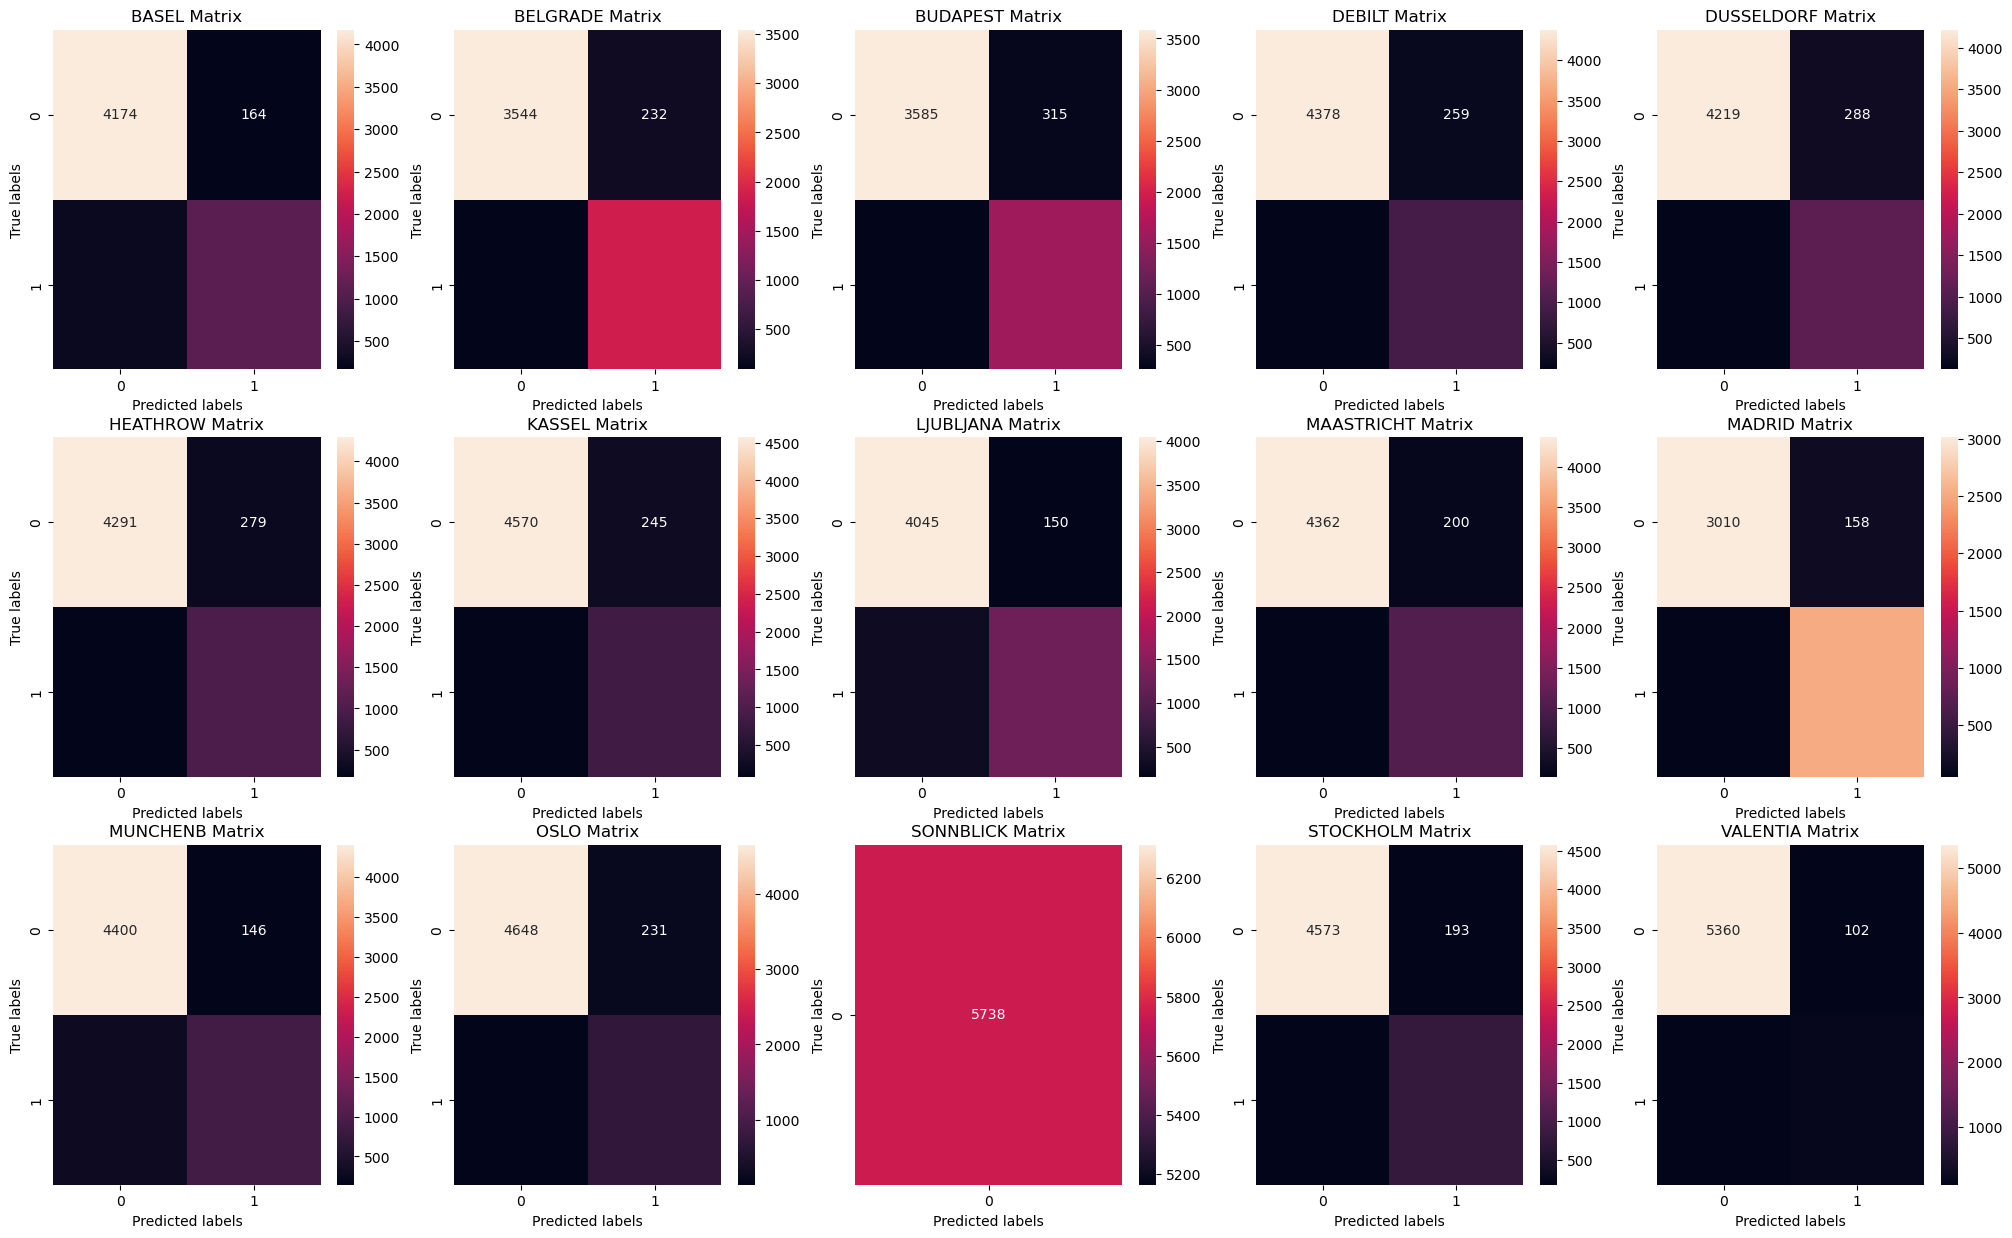

In [242]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_test_pred[:,count])  # Access elements directly from the numpy array
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

### Training

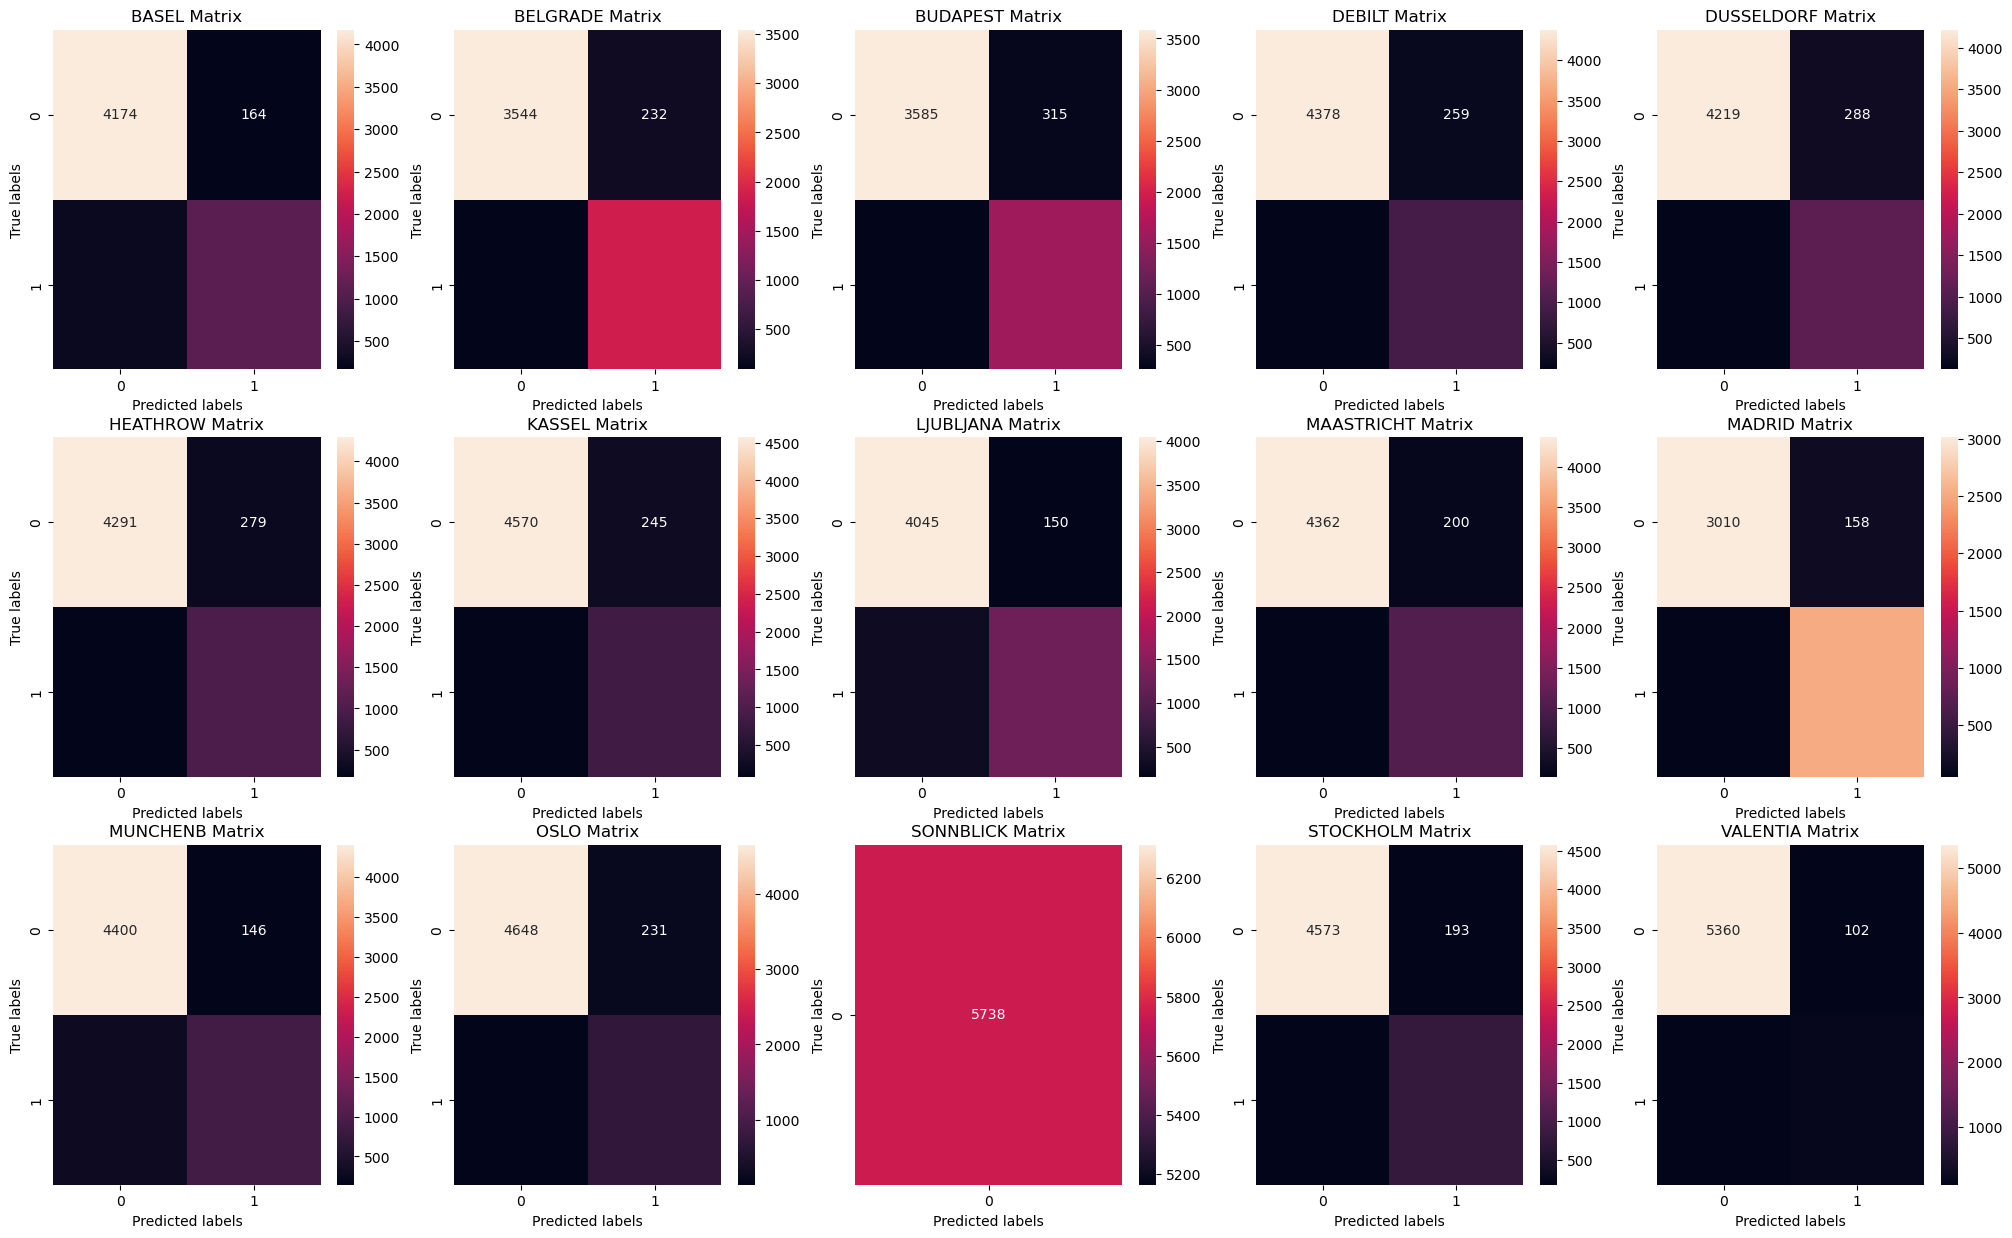

In [245]:
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test[:,count], y_test_pred[:,count])  # Access elements directly from the numpy array
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j])
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels')
        ax[i,j].set_ylabel('True labels')
        ax[i,j].set_title(name +' Matrix')
        count+=1

In [255]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

#Scaling the data
scaler = StandardScaler()

#Fit the train data
scaler.fit(X_train)

#Scaling the X data
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

print(X_train_sc[:10])

[[-1.41107749 -0.03095027 -0.61660315 ...  1.45475014  1.57581674
   1.16512065]
 [ 1.08186228 -0.58789342  0.55778807 ... -0.0139084  -0.0077553
  -0.00981651]
 [ 0.66637232 -0.866365    0.73846364 ... -2.92125284 -3.22950531
  -2.18774879]
 ...
 [ 1.08186228 -0.03095027  1.64184151 ... -0.07385364  0.48369809
  -0.61161358]
 [ 0.66637232 -0.03095027  0.64812586 ...  0.55557144  0.42909216
   0.64929458]
 [-1.41107749 -1.14483657 -1.33930544 ... -0.0139084  -0.0077553
  -0.00981651]]


C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tiffk\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


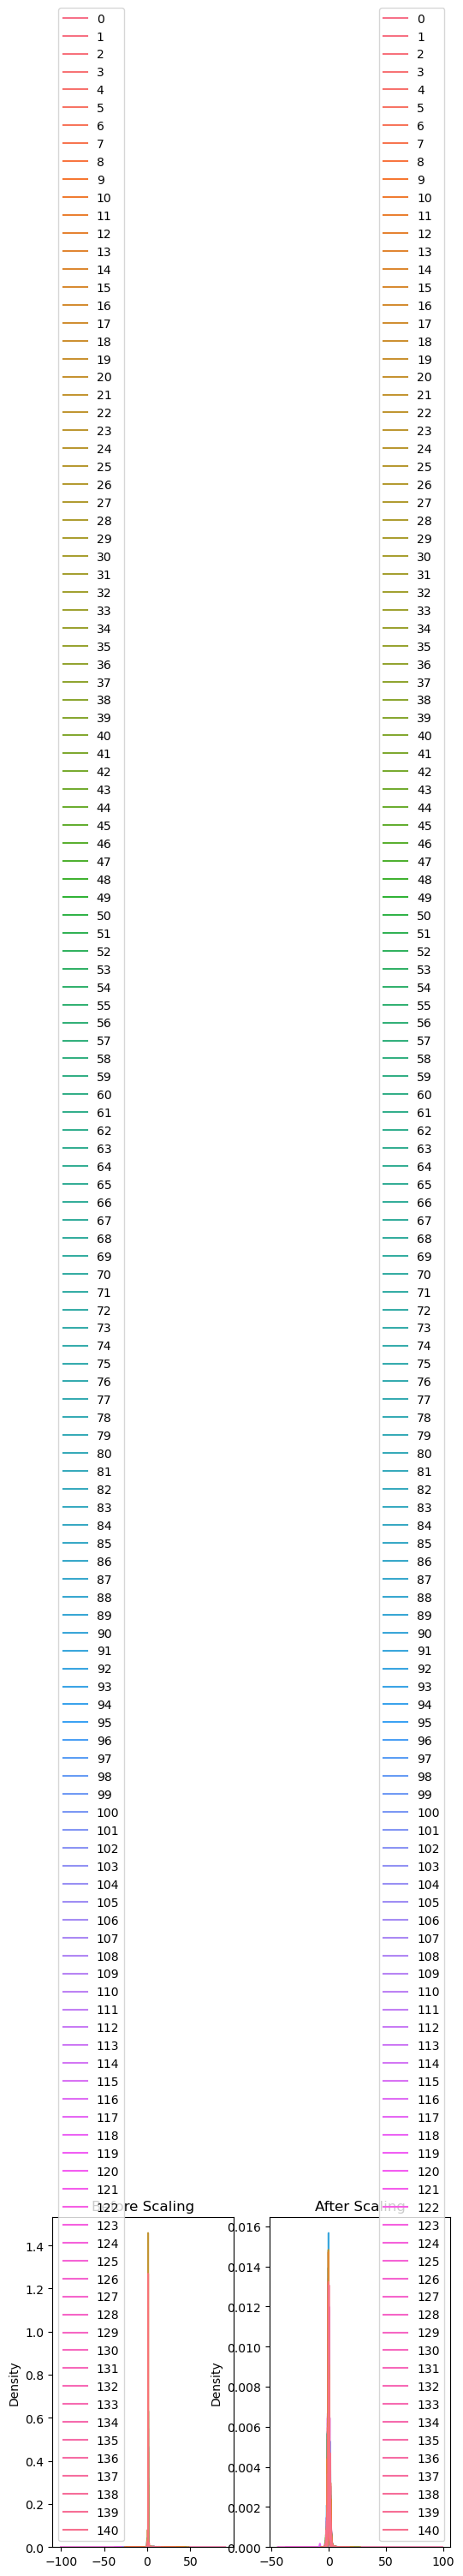

In [258]:
#Show scaling differences ##turn off legend
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train, ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_sc, ax=ax2)

plt.show()